# ANALYZING THE SALARY OF DIFFERENT JOB TITLES AND THE SALARY ASSOCIATED TO TOP INDUSTRY SKILLS

In [2]:
# STEP 1 : LOAD DATA AND MAKE NECESSARY CHANGES TO CLEAN IT
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
data_set = load_dataset('lukebarousse/data_jobs')
df= data_set['train'].to_pandas()

# Cleaning Up Data
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [52]:
# FILTERING FOR ONLY INDIAN JOB POSTING
df_india = df[df['job_country'] == 'India'].copy()
df_india = df_india.dropna(subset=['salary_year_avg'])
df_india


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [68]:
# TO GET THE TOP 3 JOBS
job_titles = df_india['job_title_short'].value_counts().index[:3].to_list()

In [69]:
job_titles

['Data Engineer', 'Data Analyst', 'Data Scientist']

In [70]:
# TO CHECK IF THESE JOB TITLES ARE IN THE DATA FRAME
df_india_top_3 = df_india[df_india['job_title_short'].isin(job_titles)]

In [77]:
# TO GET THE JOBS IN ORDER OF THEIR MEDIAN SALARY
job_order = df_india_top_3.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

In [78]:
# TO MANUALLY VERIFY THE MEDIAN OF TOP 3 JOBS
df_india_top_3.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False)

job_title_short
Data Engineer     147500.0
Data Scientist    114008.0
Data Analyst      100500.0
Name: salary_year_avg, dtype: float64

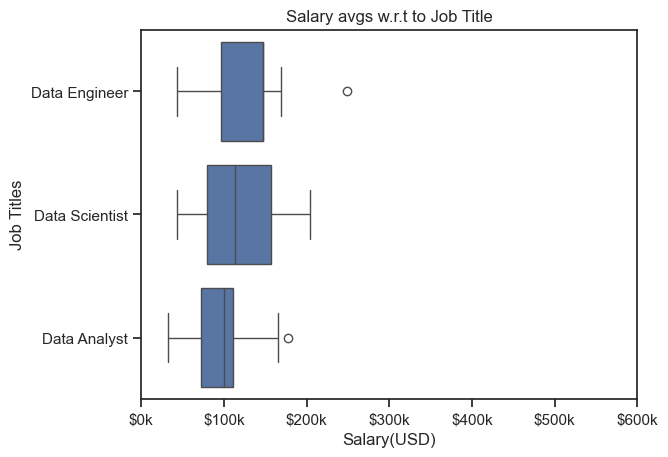

In [76]:
# PLOTTING THE BOX PLOT
sns.boxplot(data=df_india_top_3,y='job_title_short',x='salary_year_avg',order=job_order)
sns.set_theme(style='ticks')
plt.title('Salary avgs w.r.t to Job Title')
plt.xlabel('Salary(USD)')
plt.ylabel('Job Titles')
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.xlim(0,600000)
plt.show()

# ANALYSING HOW TOP SKILLS HAVE IMPACT ON MEDIAN SALARY FOR DATA ANALYST ROLE

In [81]:
# CREATING A SEPARATE DATABASE FOR ANALYSIS
df_Q2 = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='India')].copy()
df_Q2 = df_Q2.dropna(subset=['salary_year_avg']) # DROPPING NaN values

In [83]:
# EXPLODING THE JOB SKILLS COLUMN
df_Q2_exp = df_Q2.explode('job_skills')

In [97]:
# FINDING TOP PAYING SKILLS AND ARRANGING THEM IN DESCENDING ORDER
df_top_pay = df_Q2_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
df_top_pay = df_top_pay.head(10)
df_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


In [96]:
# FINDING THE MOST POPULAR SKILLS 
df_top_skills = df_Q2_exp.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_top_skills = df_top_skills.head(10)
df_top_skills


,count,median
job_skills,,
sql,46,96050.0
excel,39,98500.0
python,36,96050.0
tableau,20,108087.5
r,18,79200.0
power bi,17,111175.0
azure,15,93600.0
aws,12,79200.0
oracle,11,79200.0


In [98]:
# PLOTTING THESE TWO DATAFRAMES TO GET TOP SKILLS AND THEIR MEDIAN SALARIES AND SKILLS WITH HIGHEST MEDIAN SALARY

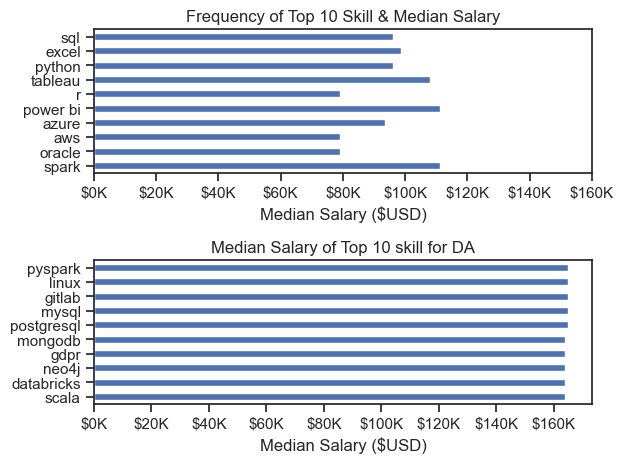

In [101]:
fig , ax = plt.subplots(2,1)

df_top_skills.plot(kind='barh',
                       y='median',
                       ax=ax[0],
                       title='Frequency of Top 10 Skill & Median Salary',
                       legend=False)


df_top_pay.plot(kind='barh',
                      y='median',
                      ax=ax[1],
                      title='Median Salary of Top 10 skill for DA',
                      legend=False)

ax[0].invert_yaxis() # FOR INVERTING THE Y AXIS
ax[1].invert_yaxis() 

ax[0].set_xlim(0,160000) # BRINGING THE LIMITS FOR BOTH PLOT AT PAR

ax[0].set_ylabel('') # REMOVING THE LABELS 
ax[1].set_ylabel('')

ax[0].set_xlabel('Median Salary ($USD)')
ax[1].set_xlabel('Median Salary ($USD)')


ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K')) #SETTING THE SALARY INTO OO'K format
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))




fig.tight_layout()
plt.show()